In [ ]:
import numpy as np
import pandas as pd
import librosa
import os
import tensorflow as tf
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import load_model
from keras.preprocessing import image
from sklearn.model_selection import train_test_split
from tensorflow.keras import models, layers
import seaborn as sns
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Mounting google Drive to import data
path = '/content/drive/MyDrive/Assignment_2_data/dataset'
data_path=os.path.join(path, "X")
label_path=os.path.join(path, "Y")

In [ ]:
x_train = np.load('/content/drive/MyDrive/Assignment_2_data/x_train.npy')
x_test = np.load('/content/drive/MyDrive/Assignment_2_data/x_test.npy')
y_train = np.load('/content/drive/MyDrive/Assignment_2_data/y_train.npy')
y_test = np.load('/content/drive/MyDrive/Assignment_2_data/y_test.npy')

In [ ]:
x_train.shape

(10000, 64, 1000, 1)

In [ ]:
input_shape = (64,1000)
RNNmodel = models.Sequential()
RNNmodel.add(LSTM(128, input_shape = input_shape))
RNNmodel.add(layers.Dense(256, activation='relu'))
RNNmodel.add(layers.Dropout(0.5))
RNNmodel.add(layers.Dense(128, activation='relu'))
RNNmodel.add(layers.Dropout(0.5))
RNNmodel.add(layers.Dense(64, activation='relu'))
RNNmodel.add(layers.Dropout(0.5))
RNNmodel.add(layers.Dense(32, activation='relu'))
RNNmodel.add(layers.Dropout(0.5))
RNNmodel.add(layers.Dense(10, activation='sigmoid'))

In [ ]:
RNNmodel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               578048    
                                                                 
 dense (Dense)               (None, 256)               33024     
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0

In [ ]:
RNNmodel.compile(optimizer='adam',loss=tf.keras.losses.BinaryCrossentropy(),metrics=["accuracy"])

In [ ]:
from keras.callbacks import ModelCheckpoint
filepath = '/content/drive/MyDrive/Assignment_2_data/RNN_best.epoch-loss.hdf5'
checkpoint = ModelCheckpoint(filepath=filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

In [ ]:
history=RNNmodel.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=32, epochs=100, verbose = 1, callbacks=[checkpoint])

Epoch 1/100
313/313 [==============================] - ETA: 0s - loss: 0.4598 - accuracy: 0.1110
Epoch 1: val_accuracy improved from -inf to 0.04800, saving model to /content/drive/MyDrive/Assignment_2_data/RNN_best.epoch-loss.hdf5
313/313 [==============================] - 14s 21ms/step - loss: 0.4598 - accuracy: 0.1110 - val_loss: 0.4364 - val_accuracy: 0.0480
Epoch 2/100
311/313 [============================>.] - ETA: 0s - loss: 0.3872 - accuracy: 0.1123
Epoch 2: val_accuracy did not improve from 0.04800
313/313 [==============================] - 5s 15ms/step - loss: 0.3871 - accuracy: 0.1126 - val_loss: 0.4338 - val_accuracy: 0.0480
Epoch 3/100
310/313 [============================>.] - ETA: 0s - loss: 0.3693 - accuracy: 0.1122
Epoch 3: val_accuracy did not improve from 0.04800
313/313 [==============================] - 4s 14ms/step - loss: 0.3690 - accuracy: 0.1125 - val_loss: 0.4343 - val_accuracy: 0.0480
Epoch 4/100
312/313 [============================>.] - ETA: 0s - loss: 0.36

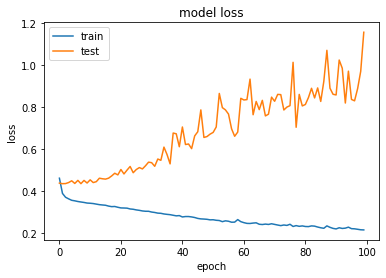

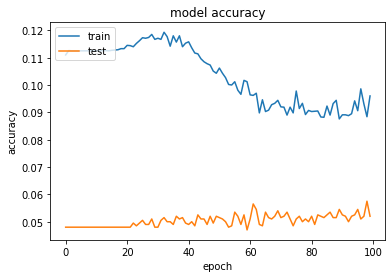

In [ ]:
from matplotlib import pyplot as plt
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
import keras
RNNmodel=keras.models.load_model('/content/drive/MyDrive/Assignment_2_data/RNN_best.epoch-loss.hdf5')
accuracy = RNNmodel.evaluate(x_test, y_test)
pred=RNNmodel.predict(x_test)

63/63 [==============================] - 1s 8ms/step


In [ ]:
def modify_predictions(y_pred, th):
  for arr in y_pred:
    i = 0
    for z in arr:
      if(z>=th):
        arr[i] = 1
      else:
        arr[i] = 0
      i = i+1
  return y_pred

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, modify_predictions(pred, 0.5)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       392
           1       0.00      0.00      0.00       436
           2       0.00      0.00      0.00       274
           3       0.33      0.16      0.22       444
           4       0.23      0.08      0.11       306
           5       0.26      0.14      0.18       221
           6       0.40      0.30      0.34       130
           7       0.14      0.20      0.17       143
           8       0.64      0.98      0.77      1246
           9       0.16      0.05      0.08       151

   micro avg       0.52      0.38      0.44      3743
   macro avg       0.22      0.19      0.19      3743
weighted avg       0.31      0.38      0.32      3743
 samples avg       0.54      0.34      0.39      3743



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import multilabel_confusion_matrix
multilabel_confusion_matrix(y_test, pred)

array([[[1608,    0],
        [ 392,    0]],

       [[1564,    0],
        [ 436,    0]],

       [[1726,    0],
        [ 274,    0]],

       [[1406,  150],
        [ 371,   73]],

       [[1618,   76],
        [ 283,   23]],

       [[1686,   93],
        [ 189,   32]],

       [[1811,   59],
        [  91,   39]],

       [[1679,  178],
        [ 114,   29]],

       [[  64,  690],
        [  29, 1217]],

       [[1808,   41],
        [ 143,    8]]])